In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from tensorflow import keras

Loading dataset:

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Checking shape of data:

In [3]:
print(f"X_train: {str(x_train.shape)}")
print(f"Y_train: {str(y_train.shape)}")
print(f"X_test:  {str(x_test.shape)}")
print(f"Y_test:  {str(y_test.shape)}")

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Checking how images look:

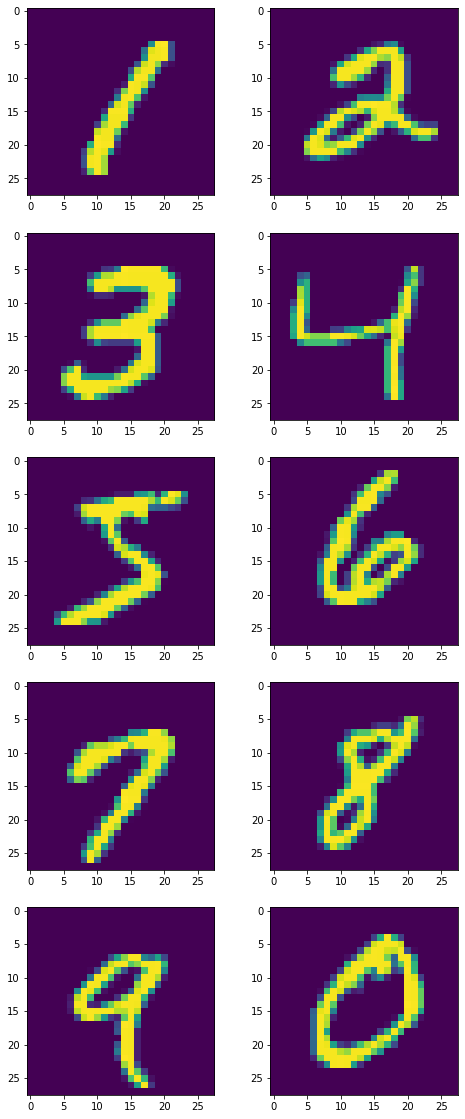

In [4]:
values = [x for x in range(10)]
indexes = [np.where(y_train==value)[0][0] for value in values]

f, axarr = plt.subplots(5,2, figsize=(8, 20)) 
axarr[0,0].imshow(x_train[indexes[1]])
axarr[0,1].imshow(x_train[indexes[2]])
axarr[1,0].imshow(x_train[indexes[3]])
axarr[1,1].imshow(x_train[indexes[4]])
axarr[2,0].imshow(x_train[indexes[5]])
axarr[2,1].imshow(x_train[indexes[6]])
axarr[3,0].imshow(x_train[indexes[7]])
axarr[3,1].imshow(x_train[indexes[8]])
axarr[4,0].imshow(x_train[indexes[9]])
axarr[4,1].imshow(x_train[indexes[0]])

plt.show()


Reshaping data, changing type of data

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [6]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [7]:
x_train /= 255
x_test /= 255

In [8]:
num_digits = 10
y_train = keras.utils.to_categorical(y_train, num_digits)
y_test = keras.utils.to_categorical(y_test, num_digits)

In [9]:
print(y_train[0])
print(y_train[2137])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 200
n_hidden_2 = 150
n_hidden_3 = 100
n_hidden_4 = 150
num_digits = 10

In [11]:
model = keras.Sequential(
    [
        keras.layers.Input(n_input, name="input"),
        keras.layers.Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1"),
        keras.layers.Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2"),
        keras.layers.Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3"),
        keras.layers.Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4"),
        keras.layers.Dense(num_digits, activation='softmax', name = "Output_Layer")
    ]
)

In [12]:
# model.add(keras.layers.Dense(n_input, input_shape=(784,)))
# model.add(keras.layers.Dense(n_hidden_1))
# model.add(keras.layers.Dense(n_hidden_2))
# model.add(keras.layers.Dense(n_hidden_3))
# model.add(keras.layers.Dense(n_hidden_4))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 200)               157000    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 150)               30150     
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               15100     
                                                                 
 Hidden_Layer_4 (Dense)      (None, 150)               15150     
                                                                 
 Output_Layer (Dense)        (None, 10)                1510      
                                                                 
Total params: 218,910
Trainable params: 218,910
Non-trainable params: 0
_________________________________________________________________


In [14]:
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(learning_rate=learning_rate)

In [15]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)

In [17]:
history1 = model.fit(x_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(x_test, y_test),
                     callbacks=[callback])

Epoch 1/20
600/600 - 4s - loss: 0.2576 - accuracy: 0.9240 - val_loss: 0.1206 - val_accuracy: 0.9638 - 4s/epoch - 7ms/step
Epoch 2/20
600/600 - 3s - loss: 0.1028 - accuracy: 0.9693 - val_loss: 0.0891 - val_accuracy: 0.9725 - 3s/epoch - 4ms/step
Epoch 3/20
600/600 - 2s - loss: 0.0689 - accuracy: 0.9783 - val_loss: 0.0873 - val_accuracy: 0.9732 - 2s/epoch - 4ms/step
Epoch 4/20
600/600 - 3s - loss: 0.0552 - accuracy: 0.9825 - val_loss: 0.0797 - val_accuracy: 0.9751 - 3s/epoch - 5ms/step
Epoch 5/20
600/600 - 3s - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0899 - val_accuracy: 0.9739 - 3s/epoch - 5ms/step
Epoch 6/20
600/600 - 2s - loss: 0.0368 - accuracy: 0.9879 - val_loss: 0.0797 - val_accuracy: 0.9770 - 2s/epoch - 4ms/step
Epoch 7/20
600/600 - 3s - loss: 0.0305 - accuracy: 0.9902 - val_loss: 0.1038 - val_accuracy: 0.9726 - 3s/epoch - 4ms/step
Epoch 8/20
600/600 - 3s - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.0861 - val_accuracy: 0.9778 - 3s/epoch - 4ms/step
Epoch 9/20
600/600 - 3s 